<a href="https://colab.research.google.com/github/davidmaemoto/VSee/blob/main/Potential_Data_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Potential Time Series Forecasting, would need more data

<ipython-input-1-ec9fa37c41d1>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Temp Timestamp'] = pd.to_datetime(df['Temp Timestamp'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


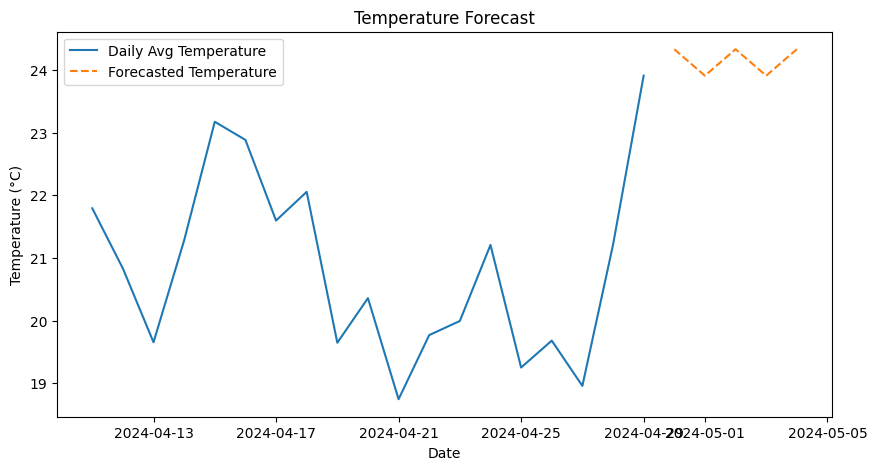

In [1]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('AIR_DETECTOR_ASH_data.xlsx')
df = df.drop(df.columns[0], axis=1)


df.columns = ['Temp Timestamp', 'Temp Value', 'Humidity Timestamp', 'Humidity Value', 'VOC Timestamp', 'VOC Value', 'CO2 Timestamp', 'CO2 Value', 'CH2O Timestamp', 'CH2O Value', 'PM2.5 Timestamp', 'PM2.5 Value']
df = df.drop(df.index[0])

df['Temp Timestamp'] = pd.to_datetime(df['Temp Timestamp'])

df.set_index('Temp Timestamp', inplace=True)

df['Temp Value'] = pd.to_numeric(df['Temp Value'], errors='coerce')
df.dropna(subset=['Temp Value'], inplace=True)

daily_avg_temp = df['Temp Value'].resample('D').mean()

daily_avg_temp = daily_avg_temp.dropna()
model = ARIMA(daily_avg_temp, order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=5)

plt.figure(figsize=(10, 5))
plt.plot(daily_avg_temp, label='Daily Avg Temperature')
plt.plot(forecast.index, forecast, label='Forecasted Temperature', linestyle='--')
plt.title('Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


<ipython-input-2-4301ca3c2dbe>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Temp Timestamp'] = pd.to_datetime(df['Temp Timestamp'])


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

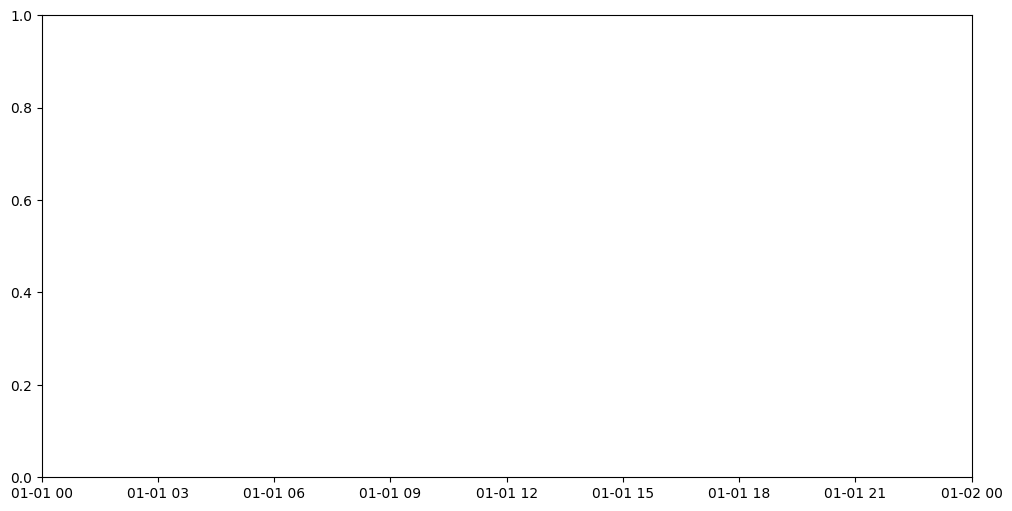

In [2]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy import stats


# df = pd.read_excel('AIR_DETECTOR_ASH_data.xlsx')
# df.columns = ['sensor_id', 'Temp Timestamp', 'Temp Value', 'Humidity Timestamp', 'Humidity Value', 'VOC Timestamp', 'VOC Value', 'CO2 Timestamp', 'CO2 Value', 'CH2O Timestamp', 'CH2O Value', 'PM2.5 Timestamp', 'PM2.5 Value']
# df = df.drop(df.index[0])


# df['Temp Timestamp'] = pd.to_datetime(df['Temp Timestamp'])
# df.set_index('Temp Timestamp', inplace=True)

# daily_avg_temp = df['Temp Value'].resample('D').mean()


# daily_std_temp = df['Temp Value'].resample('D').std()
# daily_count_temp = df['Temp Value'].resample('D').count()


# confidence_interval_temp = 1.96 * (daily_std_temp / np.sqrt(daily_count_temp))

# lower_bound_temp = daily_avg_temp - confidence_interval_temp
# upper_bound_temp = daily_avg_temp + confidence_interval_temp
# plt.figure(figsize=(12, 6))
# if not daily_avg_temp.isnull().any() and not lower_bound_temp.isnull().any() and not upper_bound_temp.isnull().any():
#     plt.fill_between(daily_avg_temp.index, lower_bound_temp, upper_bound_temp, color='gray', alpha=0.2, label='95% Confidence Interval for Temp')
#     plt.plot(daily_avg_temp.index, daily_avg_temp, label='Daily Average Temperature', color='blue')
#     plt.title('Daily Average Temperature with Confidence Intervals')
#     plt.xlabel('Date')
#     plt.ylabel('Temperature (°C)')
#     plt.legend()
#     plt.show()

#still working on this part

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df1 = pd.read_csv('1.csv')
df2 = pd.read_csv('2.csv')
df3 = pd.read_csv('3.csv')
final_df = pd.concat([df1, df2, df3], ignore_index=True)
final_df



,Temp Timestamp,Temp Value,Humidity Timestamp,Humidity Value,VOC Timestamp,VOC Value,CO2 Timestamp,CO2 Value,CH2O Timestamp,CH2O Value,PM2.5 Timestamp,PM2.5 Value
0,4/11/2024 4:12:08 PM,23,4/11/2024 4:12:08 PM,45,4/11/2024 4:12:06 PM,215,4/11/2024 4:12:07 PM,621,4/11/2024 4:12:08 PM,19,4/11/2024 4:12:08 PM,4
1,4/11/2024 4:17:46 PM,23,4/11/2024 4:17:46 PM,45,4/11/2024 4:17:46 PM,1,4/11/2024 4:17:13 PM,548,4/11/2024 4:17:46 PM,1,4/11/2024 4:17:44 PM,3
2,4/11/2024 4:22:47 PM,23,4/11/2024 4:22:47 PM,46,4/11/2024 4:22:47 PM,1,4/11/2024 4:22:19 PM,622,4/11/2024 4:22:47 PM,1,4/11/2024 4:22:47 PM,3
3,4/11/2024 4:27:49 PM,23,4/11/2024 4:27:49 PM,47,4/11/2024 4:27:49 PM,294,4/11/2024 4:27:23 PM,530,4/11/2024 4:27:49 PM,28,4/11/2024 4:27:49 PM,4
4,4/11/2024 4:32:50 PM,23,4/11/2024 4:32:50 PM,47,4/11/2024 4:32:50 PM,1,4/11/2024 4:32:25 PM,529,4/11/2024 4:32:50 PM,1,4/11/2024 4:32:50 PM,3
...,...,...,...,...,...,...,...,...,...,...,...,...
13711,4/21/2024 9:11:30 PM,32,4/21/2024 8:37:22 PM,64,4/21/2024 7:42:09 PM,18,4/21/2024 7:10:10 PM,848,4/21/2024 8:32:19 PM,5,4/21/2024 7:25:58 PM,18
13712,4/21/2024 9:16:32 PM,32,4/21/2024 9:00:29 PM,64,4/21/2024 7:47:12 PM,16,4/21/2024 7:15:11 PM,817,4/21/2024 8:37:22 PM,4,4/21/2024 7:31:09 PM,15
13713,4/21/2024 9:21:33 PM,32,4/21/2024 9:05:30 PM,63,4/21/2024 7:52:13 PM,21,4/21/2024 7:20:15 PM,754,4/21/2024 9:00:24 PM,2,4/21/2024 7:36:12 PM,16
13714,4/21/2024 9:27:34 PM,32,4/21/2024 9:10:40 PM,64,4/21/2024 8:00:13 PM,33,4/21/2024 7:25:20 PM,772,4/21/2024 9:05:30 PM,2,4/21/2024 7:41:15 PM,16


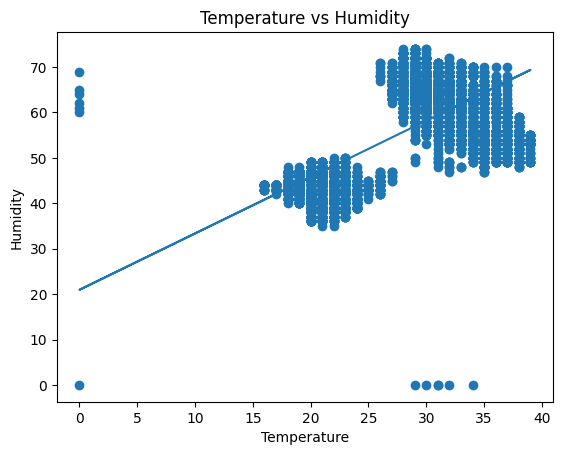

In [5]:
plt.scatter(final_df['Temp Value'], final_df['Humidity Value'])
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs Humidity')
a, b = np.polyfit(final_df['Temp Value'], final_df['Humidity Value'], 1)
plt.plot(final_df['Temp Value'], a*final_df['Temp Value']+b)
plt.show()


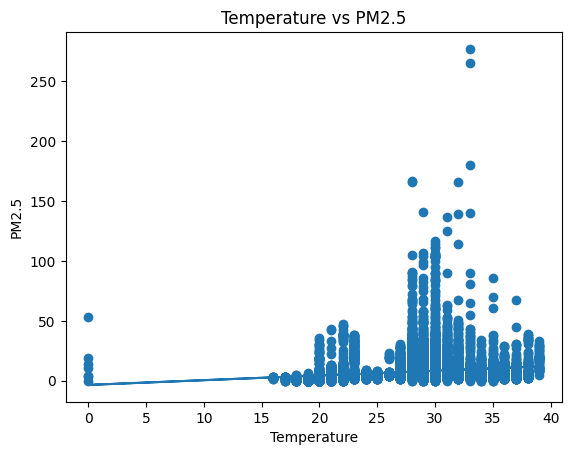

In [6]:
plt.scatter(final_df['Temp Value'], final_df['PM2.5 Value'])
plt.xlabel('Temperature')
plt.ylabel('PM2.5')
plt.title('Temperature vs PM2.5')
a, b = np.polyfit(final_df['Temp Value'], final_df['PM2.5 Value'], 1)
plt.plot(final_df['Temp Value'], a*final_df['Temp Value']+b)
plt.show()